In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#数据导入
earthquake = pd.read_csv(r'Seaborn/earthquake.csv')

In [3]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [8]:
earthquake['date_parsed'] = pd.to_datetime(earthquake['Date'], format = "%m/%d/%Y", errors='coerce')

In [10]:
earthquake['date_parsed']

0       1965-01-02
1       1965-01-04
2       1965-01-05
3       1965-01-08
4       1965-01-09
           ...    
23407   2016-12-28
23408   2016-12-28
23409   2016-12-28
23410   2016-12-29
23411   2016-12-30
Name: date_parsed, Length: 23412, dtype: datetime64[ns]

In [12]:
earthquake['date_parsed'].loc[earthquake['date_parsed'].isnull()]

3378    NaT
7512    NaT
20650   NaT
Name: date_parsed, dtype: datetime64[ns]

In [13]:
earthquake['Date'].loc[[3378,7512,20650]]

3378     1975-02-23T02:58:41.000Z
7512     1985-04-28T02:53:41.530Z
20650    2011-03-13T02:23:34.520Z
Name: Date, dtype: object

In [17]:
earthquake['Date'][3378] = '02/23/1975'
earthquake['Date'][7512] = '04/28/1985'
earthquake['Date'][20650] = '03/13/2011'

In [18]:
earthquake['Date']

0        01/02/1965
1        01/04/1965
2        01/05/1965
3        01/08/1965
4        01/09/1965
            ...    
23407    12/28/2016
23408    12/28/2016
23409    12/28/2016
23410    12/29/2016
23411    12/30/2016
Name: Date, Length: 23412, dtype: object

In [19]:
earthquake['date_parsed']

0       1965-01-02
1       1965-01-04
2       1965-01-05
3       1965-01-08
4       1965-01-09
           ...    
23407   2016-12-28
23408   2016-12-28
23409   2016-12-28
23410   2016-12-29
23411   2016-12-30
Name: date_parsed, Length: 23412, dtype: datetime64[ns]

In [16]:
earthquake['date_parsed'] = pd.to_datetime(earthquake['Date'], format = "%m/%d/%Y", errors='coerce')
earthquake['date_parsed']

0       1965-01-02
1       1965-01-04
2       1965-01-05
3       1965-01-08
4       1965-01-09
           ...    
23407   2016-12-28
23408   2016-12-28
23409   2016-12-28
23410   2016-12-29
23411   2016-12-30
Name: date_parsed, Length: 23412, dtype: datetime64[ns]

添加年份和月份两列

In [20]:
earthquake['Year'] = earthquake['date_parsed'].dt.year

In [21]:
earthquake['Month'] = earthquake['date_parsed'].dt.month

In [22]:
earthquake['Year']

0        1965
1        1965
2        1965
3        1965
4        1965
         ... 
23407    2016
23408    2016
23409    2016
23410    2016
23411    2016
Name: Year, Length: 23412, dtype: int64

筛选出type为Earthquake的数据

In [23]:
earthquake = earthquake[earthquake['Type'] == 'Earthquake']

In [24]:
earthquake.Type.unique()

array(['Earthquake'], dtype=object)

In [25]:
earthquake.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,date_parsed,Year,Month
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02,1965,1
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04,1965,1
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05,1965,1
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08,1965,1
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09,1965,1


用countplot绘制条形图
> sns.countplot(earthquake['Year'])

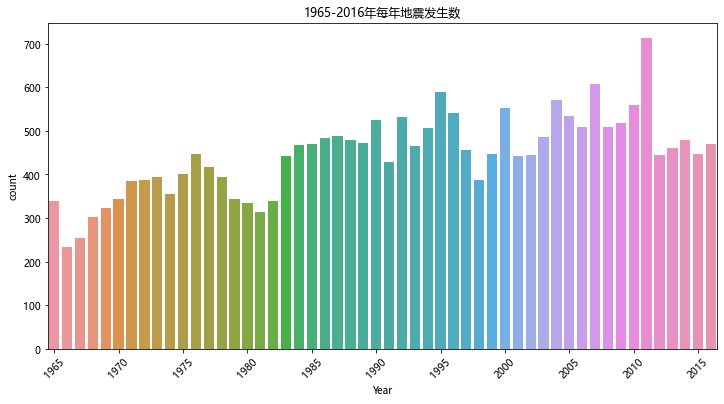

In [26]:
# 中文乱码的处理
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']# 设置微软雅黑字体
plt.rcParams['axes.unicode_minus'] = False # 避免坐标轴不能正常的显示负号

plt.figure(1,figsize=(12,6))
Year = [i for i in range(1965,2017,5)]
idx = [i for i in range(0,52,5)]
sns.countplot(earthquake['Year'])
plt.setp(plt.xticks(idx,Year)[1],rotation=45)
plt.title('1965-2016年每年地震发生数')
plt.show()

### 作热力图heatmap去看看近十年来的地震记录  
按年份和月份列进行分组，取出年份、月份及ID列；  
删选出近十年的数据；  
将年份、月份及ID列做成数据透视表；  
将近十年来的地震记录数按照年份和月份做热力图   
设置一个标题：'近10年地震发生次数'  

In [27]:
earthquake

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,date_parsed,Year,Month
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02,1965,1
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04,1965,1
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05,1965,1
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08,1965,1
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09,1965,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed,2016-12-28,2016,12
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed,2016-12-28,2016,12
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,4.8,1.5200,US10007NAF,US,US,US,Reviewed,2016-12-28,2016,12
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,6.0,1.4300,US10007NL0,US,US,US,Reviewed,2016-12-29,2016,12


In [29]:
# 按年份和月份列进行分组
MY_data = earthquake.groupby([earthquake['Year'],earthquake['Month']],as_index=False).count()
# 取出年份、月份及ID列
test = MY_data[['Year','Month','ID']]

In [30]:
MY_data

,Year,Month,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,date_parsed
0,1965,1,13,13,13,13,13,13,0,0,...,0,0,0,0,13,13,13,13,13,13
1,1965,2,54,54,54,54,54,54,0,0,...,0,0,0,0,54,54,54,54,54,54
2,1965,3,38,38,38,38,38,38,0,0,...,0,0,0,0,38,38,38,38,38,38
3,1965,4,33,33,33,33,33,33,0,0,...,0,0,0,0,33,33,33,33,33,33
4,1965,5,22,22,22,22,22,22,0,0,...,0,0,0,0,22,22,22,22,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,2016,8,35,35,35,35,35,35,35,0,...,35,35,35,35,35,35,35,35,35,35
620,2016,9,46,46,46,46,46,46,46,1,...,46,45,46,46,46,46,46,46,46,46
621,2016,10,36,36,36,36,36,36,36,0,...,36,36,36,36,36,36,36,36,36,36
622,2016,11,44,44,44,44,44,44,44,0,...,44,44,44,44,44,44,44,44,44,44


In [31]:
test

,Year,Month,ID
0,1965,1,13
1,1965,2,54
2,1965,3,38
3,1965,4,33
4,1965,5,22
...,...,...,...
619,2016,8,35
620,2016,9,46
621,2016,10,36
622,2016,11,44


In [32]:
# 将年份、月份及ID列做成数据透视表；
ptest = test.pivot('Year','Month','ID')
ptest

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1965,13,54,38,33,22,32,21,34,28,17,27,20
1966,12,27,23,21,22,27,12,35,12,13,13,16
1967,36,18,23,19,12,22,15,24,24,17,27,18
1968,23,20,16,12,49,31,23,40,26,24,19,20
1969,26,21,30,31,17,18,22,62,36,24,14,21
1970,25,33,25,42,27,33,22,27,19,22,33,36
1971,34,28,28,26,36,18,64,36,39,34,18,25
1972,32,24,31,28,31,23,25,40,44,29,35,46
1973,23,31,40,28,22,51,37,37,33,17,39,36


筛选出近十年的数据：
10 * 12 = 120
近十年数据为从末数120行

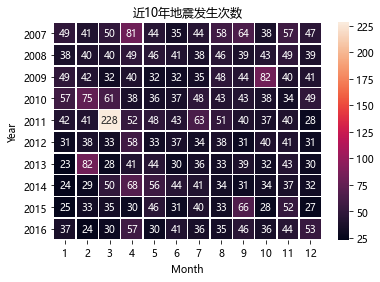

In [33]:
# 将近十年来的地震记录数按照年份和月份做热力图
heatdata = test.iloc[-120:,:]
heatdata = heatdata.pivot('Year','Month','ID')
sns.heatmap(heatdata, linewidths=.5, annot=True, fmt="d")
plt.title('近10年地震发生次数')
plt.show()

做时间序列图去探究以年为单位，地震记录的趋势

In [34]:
temp = earthquake.groupby('Year', as_index=False).count()
temp = temp.loc[:,['Year','ID']]

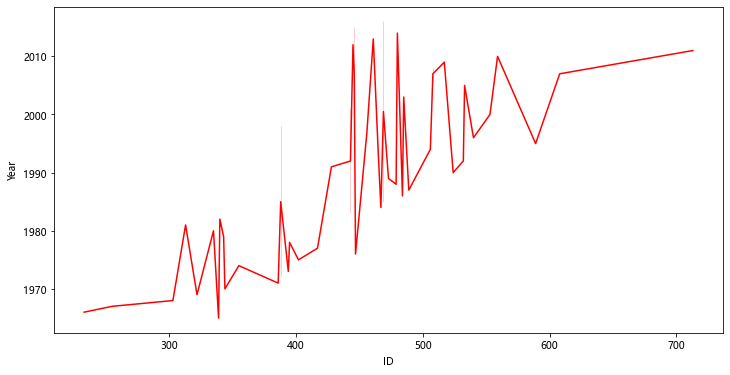

In [42]:
plt.figure(1,figsize=(12,6))
sns.lineplot(temp.ID,temp.Year,color="r")
plt.show()

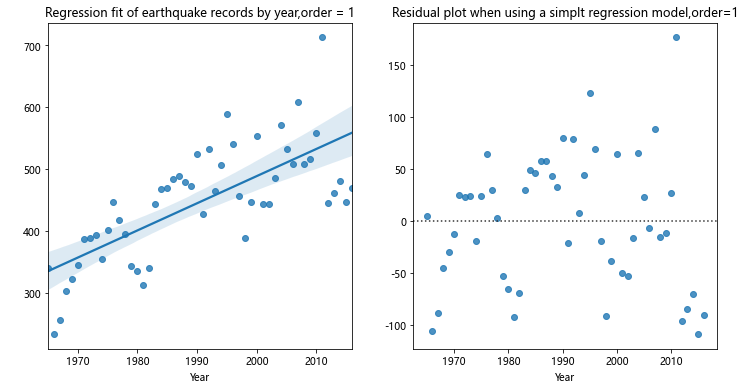

In [37]:
# 对以年为单位的地震记录作线性回归拟合
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.regplot(x="Year", y="ID", data=temp,order=1) # default by 1
plt.ylabel(' ')
plt.title('Regression fit of earthquake records by year,order = 1')

plt.subplot(122)
sns.residplot(x="Year", y="ID", data=temp)
plt.ylabel(' ')
plt.title('Residual plot when using a simplt regression model,order=1')
plt.show()

上方分别是对地震记录以年为单位统计之后的一阶线性回归拟合以及拟合后残值分布的情况。同样的思路，可以尝试高阶拟合，如下图的二阶拟合。

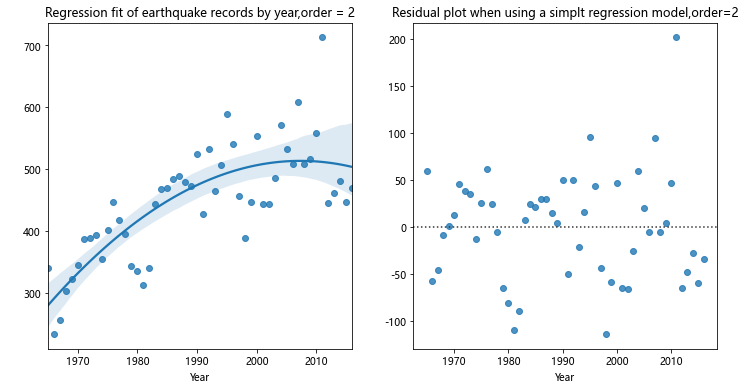

In [38]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.regplot(x="Year", y="ID", data=temp,order=2) # default by 1
plt.ylabel(' ')
plt.title('Regression fit of earthquake records by year,order = 2')

plt.subplot(122)
sns.residplot(x="Year", y="ID", data=temp,order=2)
plt.ylabel(' ')
plt.title('Residual plot when using a simplt regression model,order=2')

plt.show()

同样的尝试，我们可以对地震记录中的深度Depth和强度Magnitude做线性拟合。

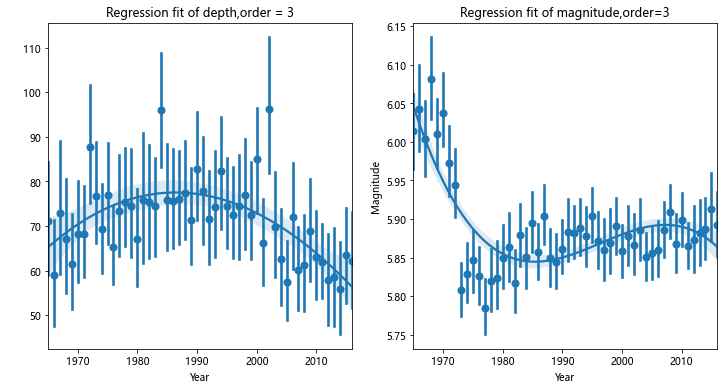

In [40]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.regplot(x="Year", y="Depth", data=earthquake,x_jitter=.05, x_estimator=np.mean,order=3)
  # x_estimator是一个参数，相当于对每年地震记录中参数取平均值，探究平均值的趋势
plt.ylabel(' ')
plt.title('Regression fit of depth,order = 3')

plt.subplot(122)
sns.regplot(x="Year", y="Magnitude", data=earthquake,x_jitter=.05, x_estimator=np.mean,order=3)
    # x_estimator是一个参数，相当于对每年地震记录中参数取平均值，探究平均值的趋势
plt.title('Regression fit of magnitude,order=3')
plt.show()